In [20]:
# make sure pyhexz will be found
import os, sys
# Assume we are somewhere in the hexz source tree. Navigate to its root.
p = os.getcwd()
while p != os.path.dirname(p):
    if os.path.isdir(os.path.join(p, "cpp")):
        sys.path.insert(0, os.path.join(p, "pyhexz/src"))
        break
    p = os.path.dirname(p)
else:
    raise IOError("Source root not found. This notebook will not work.")

In [21]:
import pyhexz.model_eval as me
import pandas as pd
from matplotlib import pyplot as plt

In [22]:
from importlib import reload
reload(me)

<module 'pyhexz.model_eval' from '/home/dw/git/github.com/dnswlt/hexz/pyhexz/src/pyhexz/model_eval.py'>

In [29]:
stats = me.weights_timeline("res10", os.path.join(os.getenv("HOME"), "tmp/hexz-models"))

In [30]:
# Massage stats into a pandas DataFrame
dfs = []
layer_types = list(stats[0][1].keys())
for layer_type in layer_types:
    df = pd.DataFrame({
            (layer_type, "std"): [s[layer_type].std for _, s in stats],
            (layer_type, "iqr"): [s[layer_type].iqr() for _, s in stats],
            (layer_type, "norm_l1"): [s[layer_type].norm_l1 for _, s in stats],
            (layer_type, "norm_l2"): [s[layer_type].norm_l2 for _, s in stats],        
        }, index=[i for i, _ in stats])
    #df.columns = pd.MultiIndex.from_product([[layer_type], df.columns])
    dfs.append(df)
X = pd.concat(dfs, axis=1)

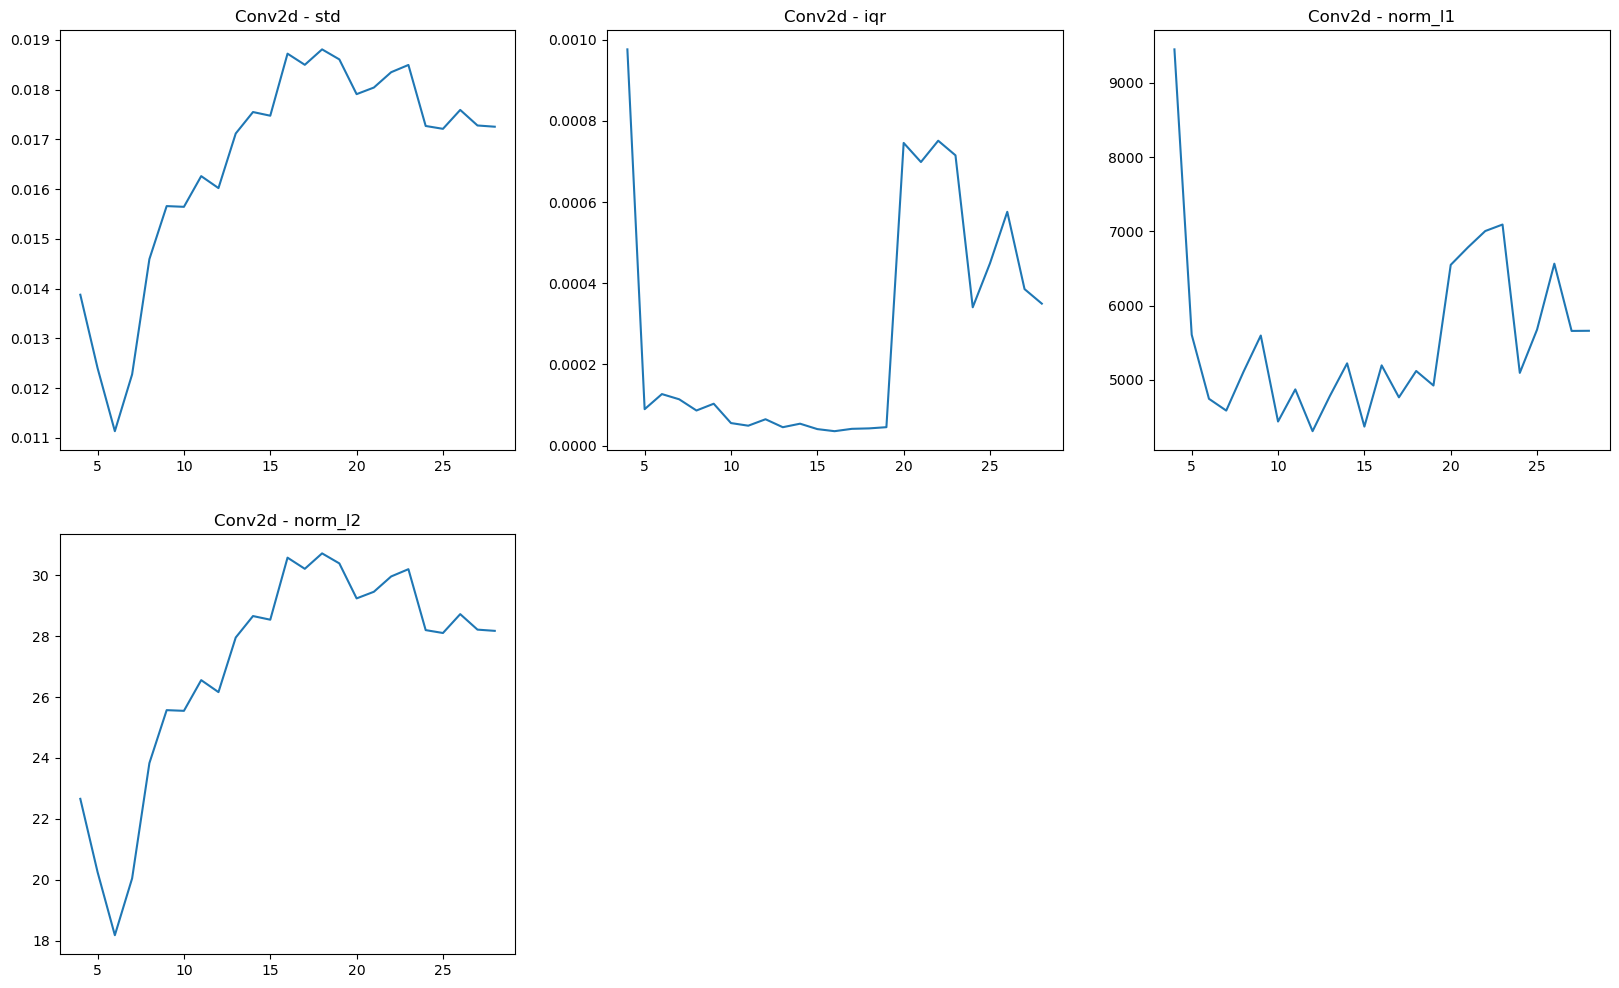

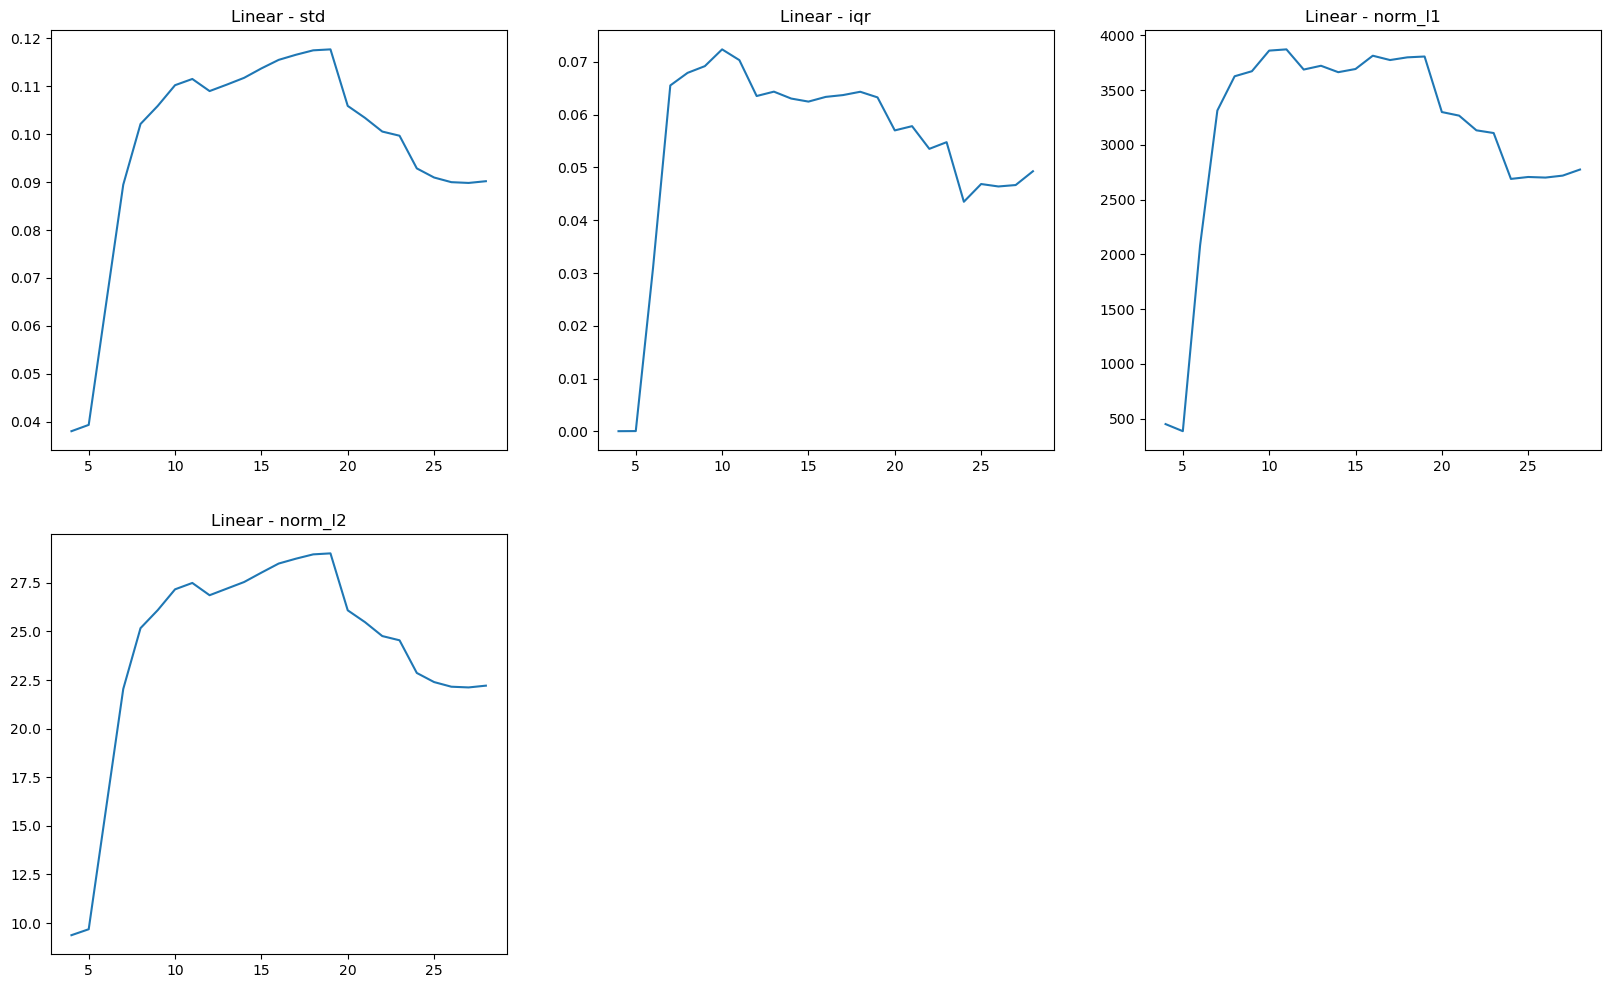

In [34]:
stats_to_plot = ["std", "iqr", "norm_l1", "norm_l2"]
nrows = (len(stats_to_plot)+2)//3
for layer_type in layer_types:
    fig, axs = plt.subplots(nrows, 3, figsize=(20, 6*nrows))
    for k, s in enumerate(stats_to_plot):
        X.iloc[4:][layer_type][s].plot(title=f"{layer_type} - {s}", ax=axs[k//3][k%3])
    k += 1
    while k < len(axs) * len(axs[0]):
        axs[k//3][k%3].set_visible(False)
        k += 1
#X.iloc[4:].plot()